In [1]:
import os.path

from torch.utils.data import TensorDataset

from evaluation import visualize_results
from load_neural_net import load_models
from settings import FEATURES, BASE_DIR

model_dir = os.path.join(BASE_DIR, "best_models", "neural_net")
models = load_models(input_dim=len(FEATURES), base_dir=model_dir)
models


Loaded params for fold 1: {'patience': 50, 'num_hidden_layers': 3, 'learning_rate': 0.01, 'dropout_rate': 0.3, 'batch_size': 256}
Loaded params for fold 2: {'patience': 50, 'num_hidden_layers': 3, 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 256}
Loaded params for fold 3: {'patience': 50, 'num_hidden_layers': 2, 'learning_rate': 0.01, 'dropout_rate': 0.1, 'batch_size': 64}
Loaded params for fold 4: {'patience': 150, 'num_hidden_layers': 2, 'learning_rate': 0.001, 'dropout_rate': 0.1, 'batch_size': 516}
Loaded params for fold 5: {'patience': 100, 'num_hidden_layers': 3, 'learning_rate': 0.005, 'dropout_rate': 0.1, 'batch_size': 64}


[Net(
   (net): Sequential(
     (0): Linear(in_features=5, out_features=512, bias=True)
     (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): Dropout(p=0.3, inplace=False)
     (4): Linear(in_features=512, out_features=256, bias=True)
     (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (6): ReLU()
     (7): Dropout(p=0.3, inplace=False)
     (8): Linear(in_features=256, out_features=128, bias=True)
     (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (10): ReLU()
     (11): Dropout(p=0.3, inplace=False)
     (12): Linear(in_features=128, out_features=1, bias=True)
   )
 ),
 Net(
   (net): Sequential(
     (0): Linear(in_features=5, out_features=512, bias=True)
     (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): Dropout(p=0.3, inplace=False)
     (4): Linear(in_features=51

In [2]:
import pandas as pd
test_path = os.path.join(BASE_DIR, "dataset", "test.csv")
test_df = pd.read_csv(test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           200 non-null    object 
 1   rating           200 non-null    float64
 2   no_of_votes      200 non-null    int64  
 3   meta_score       200 non-null    float64
 4   release_date     200 non-null    float64
 5   gross            200 non-null    float64
 6   budget           200 non-null    float64
 7   countries        200 non-null    object 
 8   log_budget       200 non-null    float64
 9   log_no_of_votes  200 non-null    float64
 10  log_gross        200 non-null    float64
 11  log_gross_bin    200 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 18.9+ KB


Fold 1
Overall Metrics (Test):
  R2: 0.6455
  MAE: 59323692.3
  MAPE: 14.41


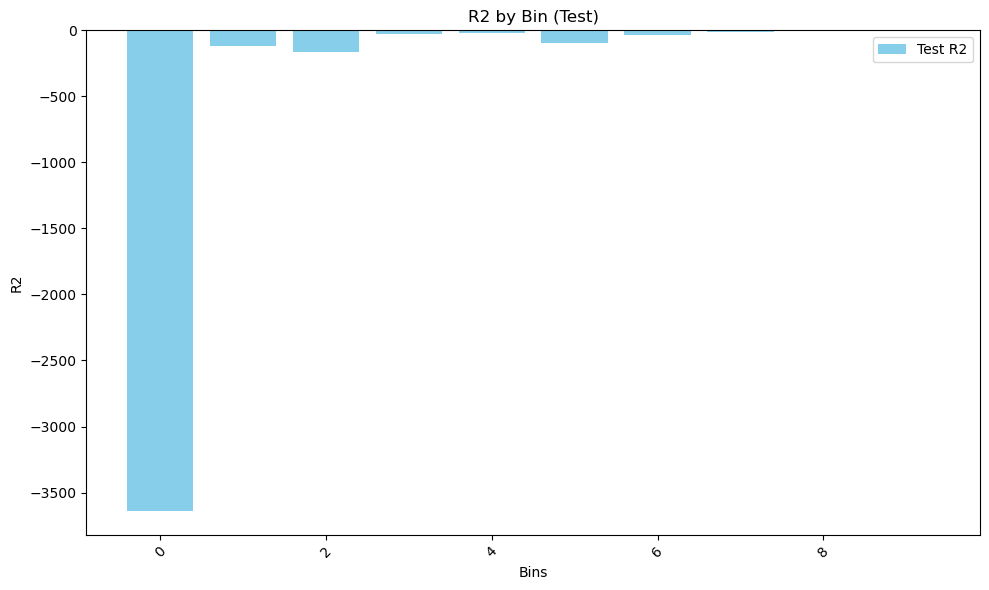

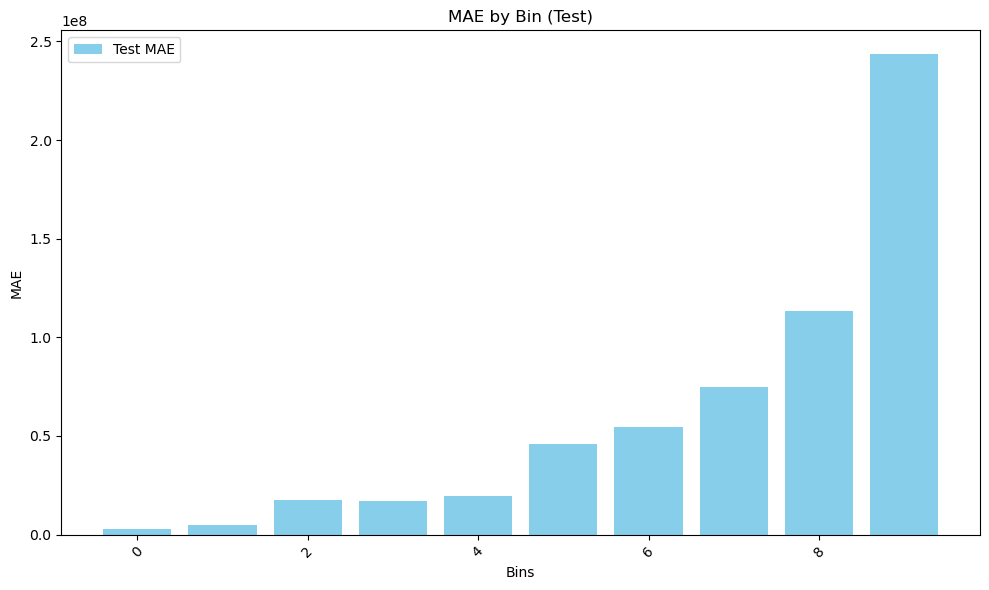

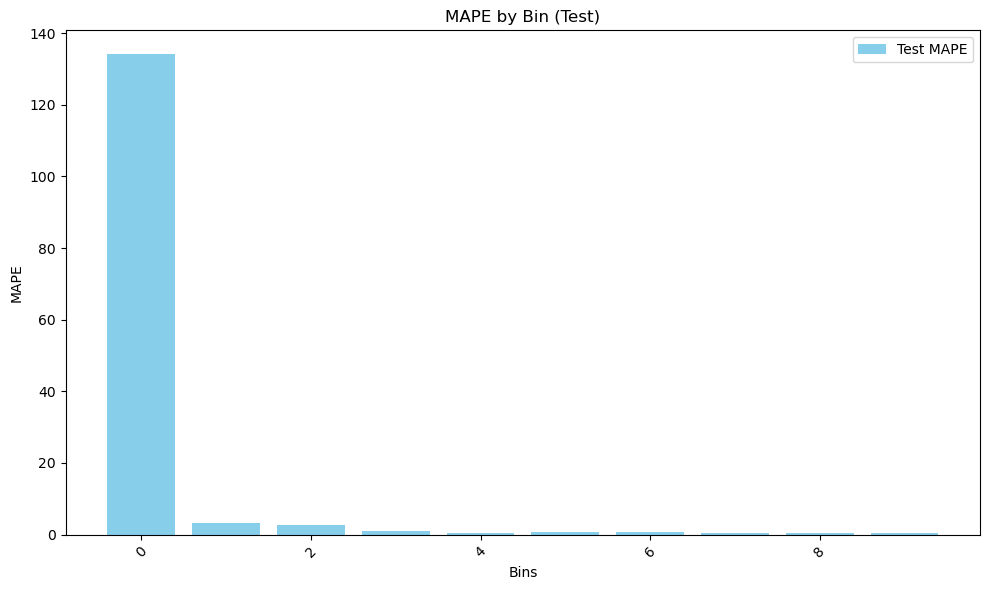

Fold 2
Overall Metrics (Test):
  R2: 0.5314
  MAE: 68472905.4
  MAPE: 28.18


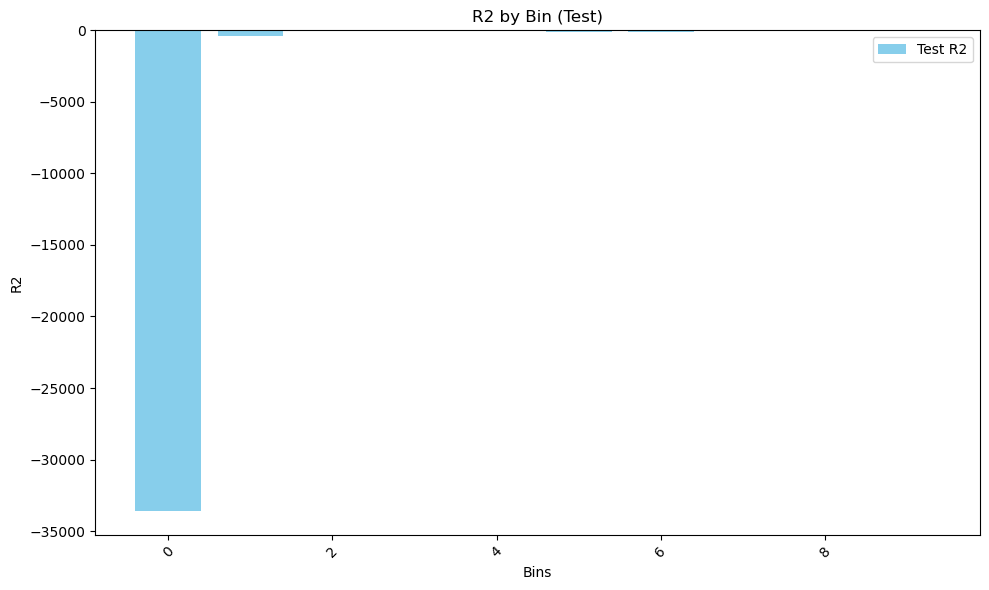

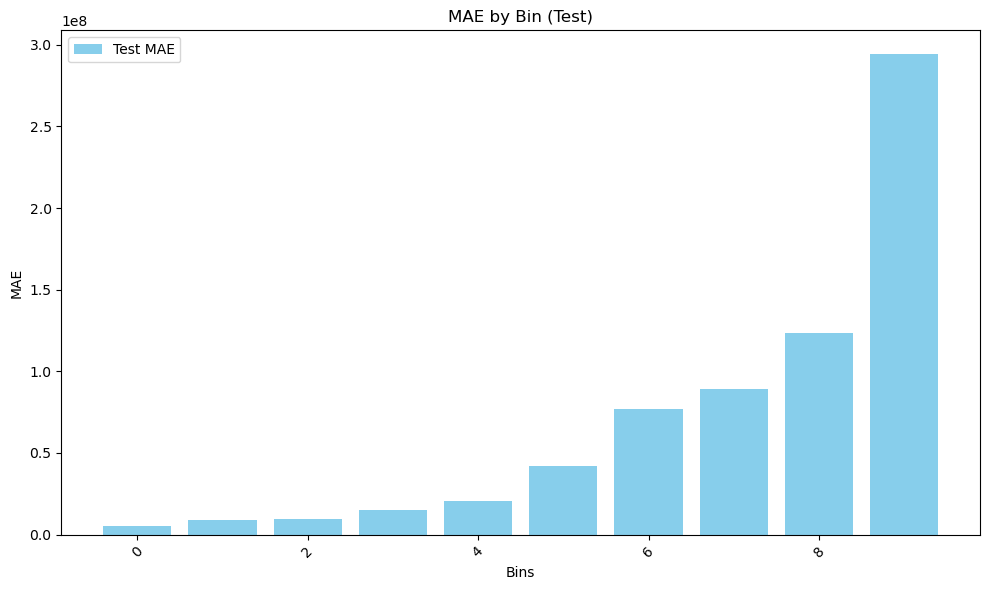

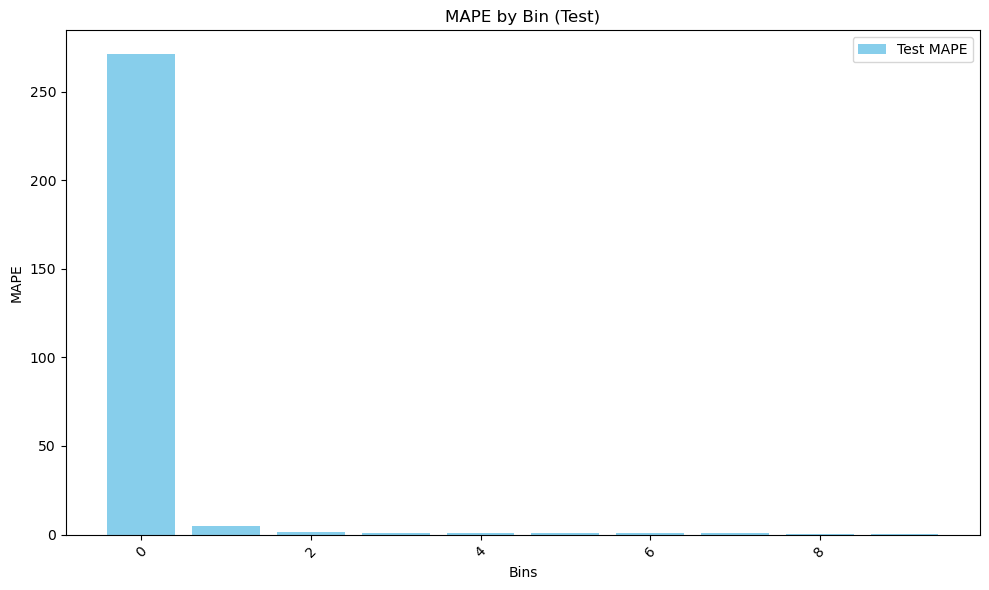

Fold 3
Overall Metrics (Test):
  R2: 0.5730
  MAE: 64881593.2
  MAPE: 206.64


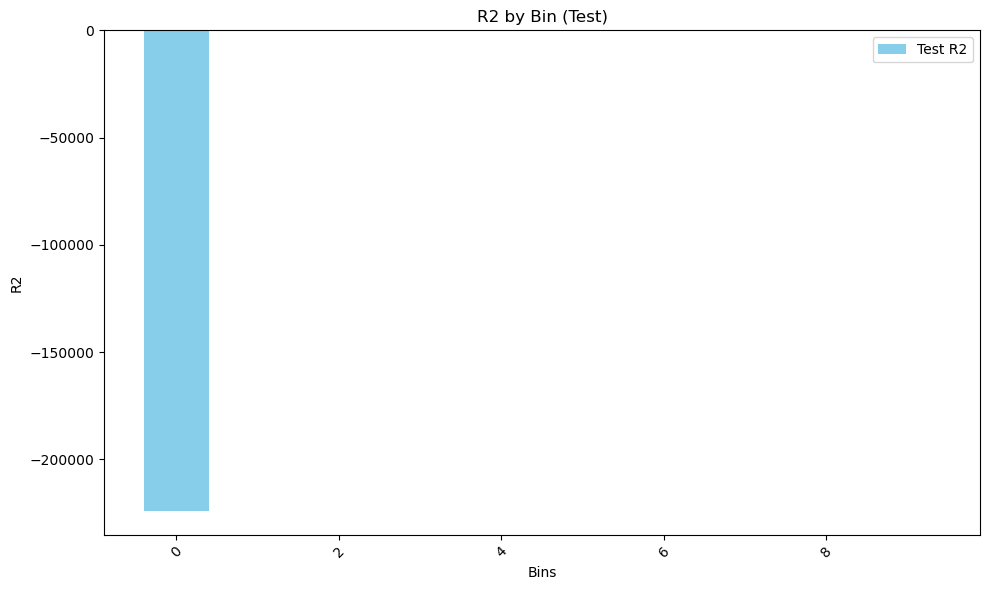

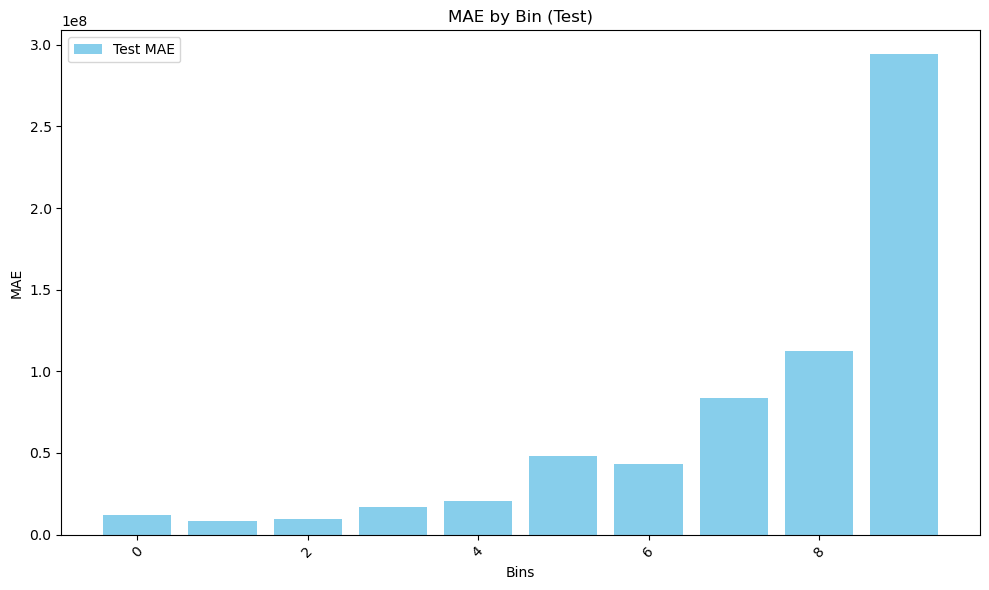

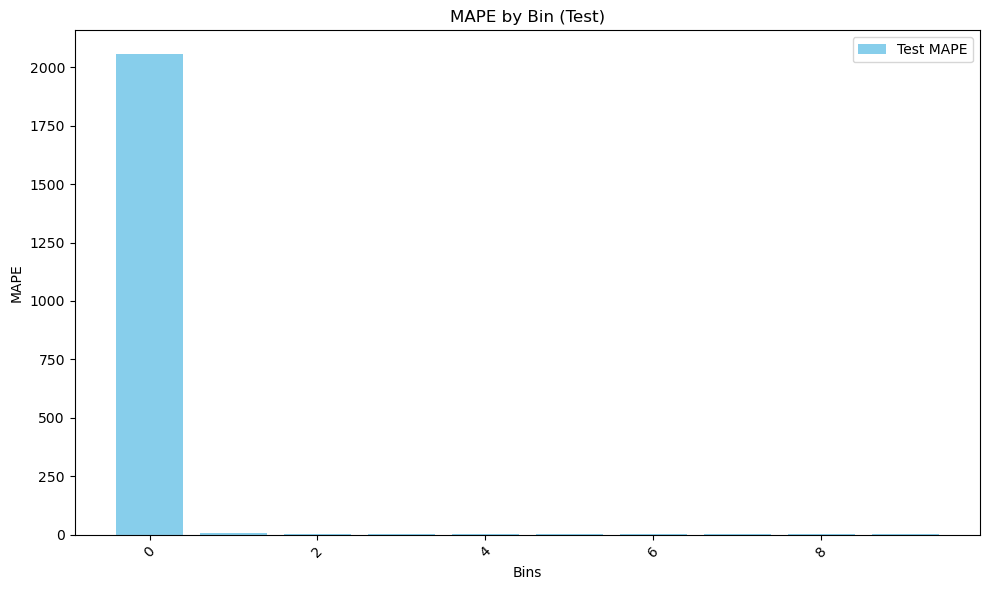

Fold 4
Overall Metrics (Test):
  R2: 0.2497
  MAE: 89051243.1
  MAPE: 17.69


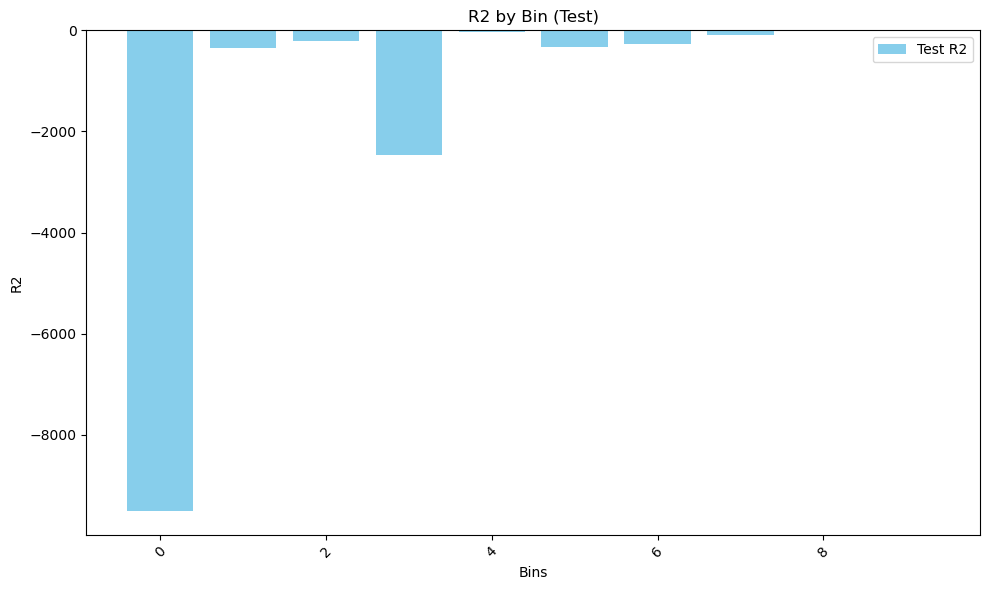

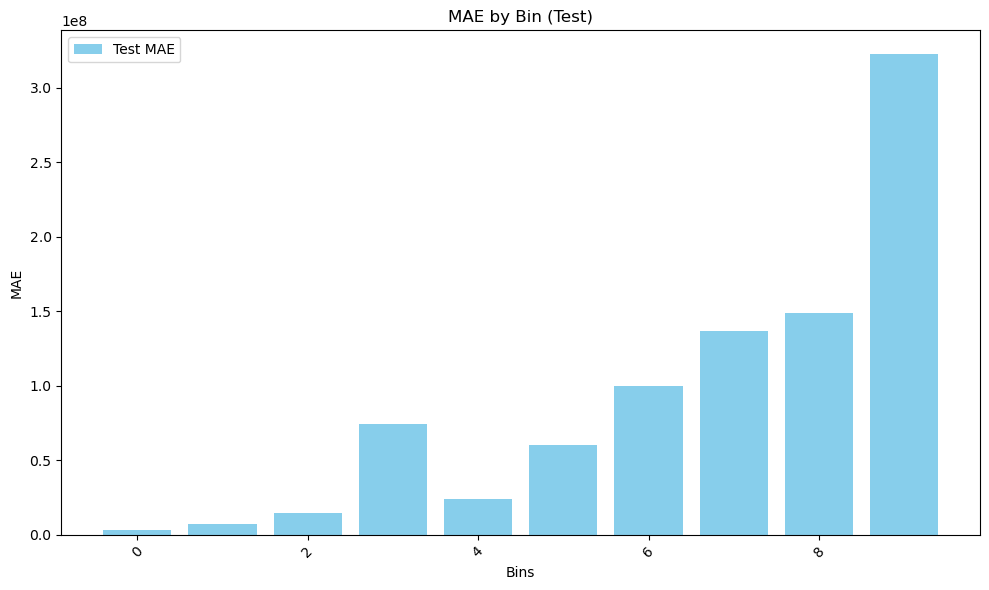

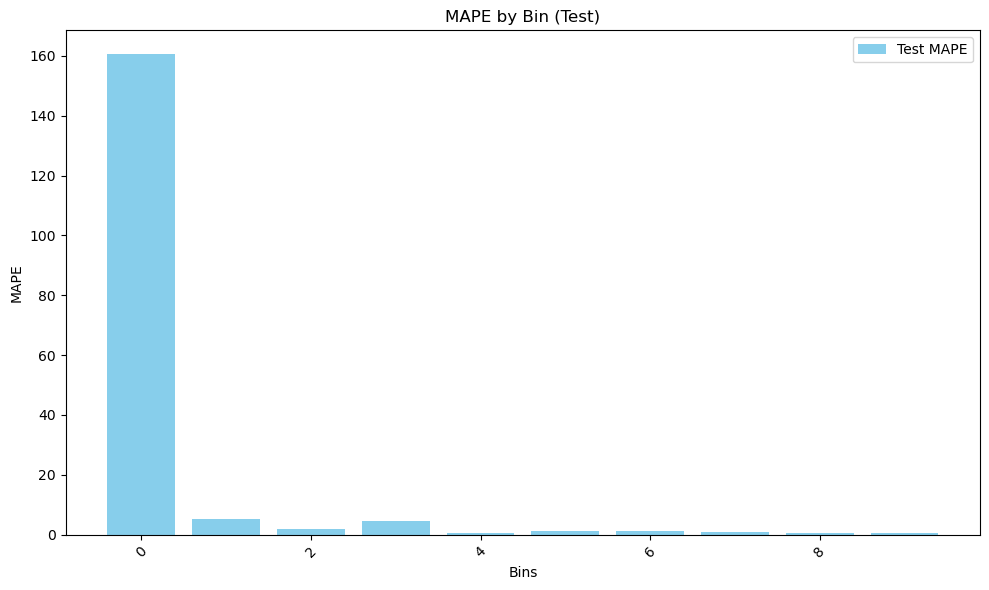

Fold 5
Overall Metrics (Test):
  R2: 0.5602
  MAE: 66505235.6
  MAPE: 46.84


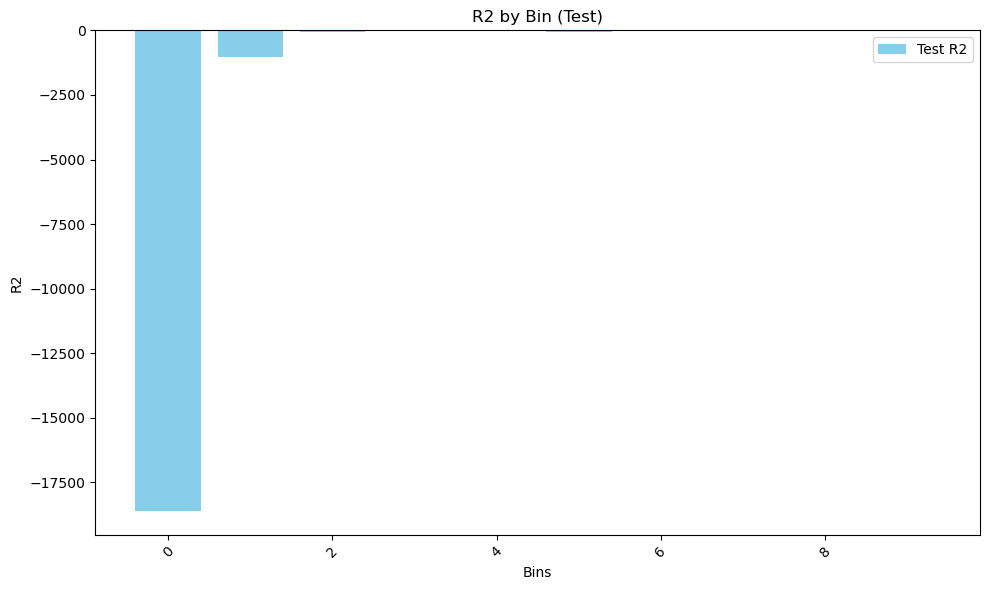

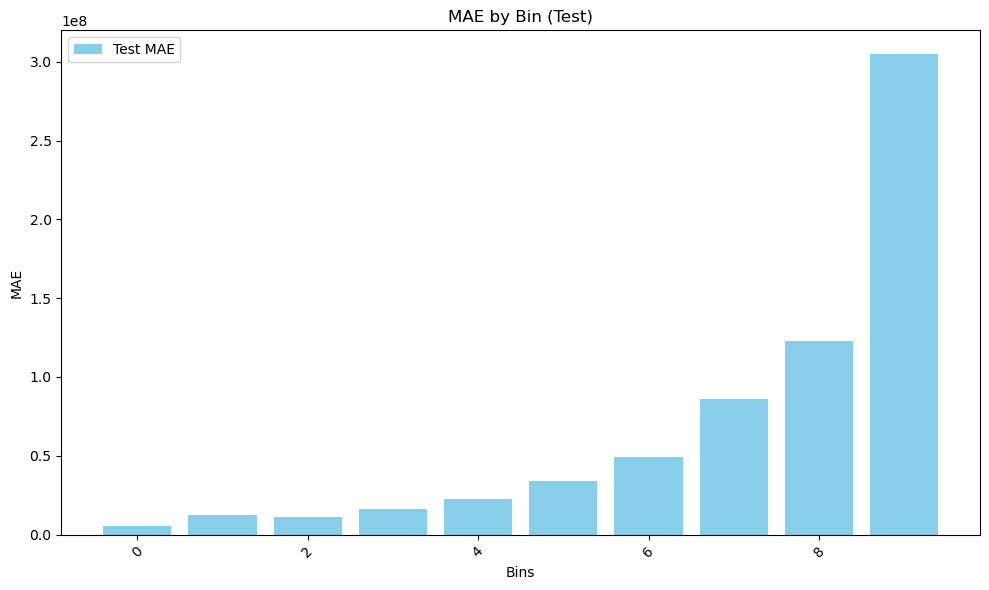

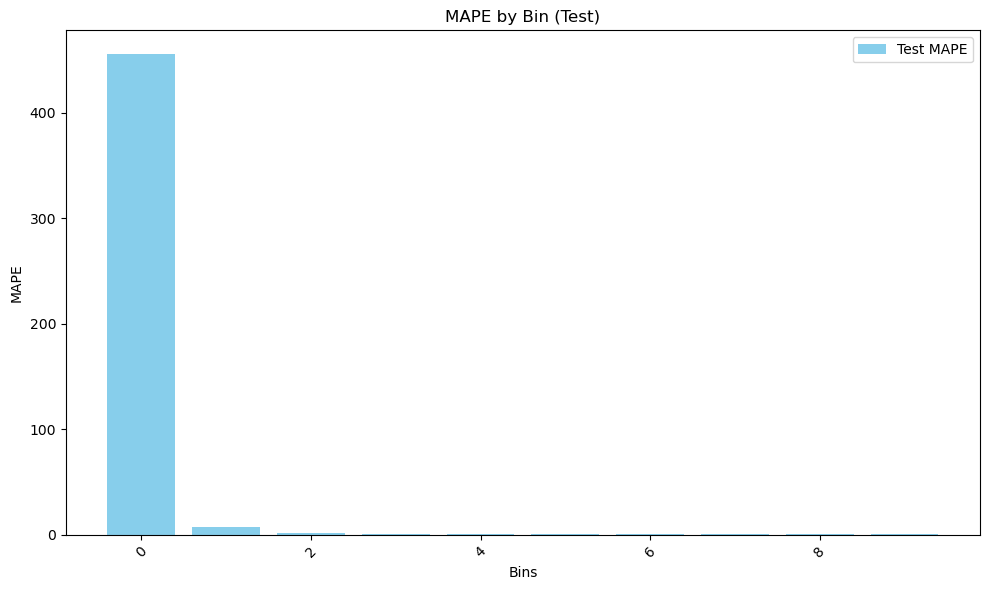

In [3]:
from settings import DEVICE
import numpy as np
from data import load_data_test
from settings import TARGET
results = []
import torch
from evaluation import _calculate_metrics
for index, model in enumerate(models):
    X_test, y_test = load_data_test(
    df=test_df,
    folder_path= model_dir,
    fold=index+1,
    target=TARGET,
    features=FEATURES
)
    # Chuyển dữ liệu về Tensor và gửi lên thiết bị (CPU/GPU)
    input_tensor = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)

    # Mô hình dự đoán
    with torch.no_grad():
        pred = model(input_tensor)
        print(f"Fold {index+1}")
        test_metrics_df = visualize_results(
            df=test_df,
            y_true=y_test,
            y_pred=pred.cpu().numpy(),
            bin_column='log_gross_bin',
            calculate_real_target=True,
            dataset_label="Test"
        )
        results.append(pred.cpu().numpy())  # Chuyển về NumPy và lưu kết quả

# Tính trung bình dự đoán từ 5 mô hình
results = np.array(results)  # Chuyển danh sách sang NumPy array (shape: [5, num_samples])
average_predictions = np.mean(results, axis=0).reshape(-1)  # Trung bình trên trục 0 (5 mô hình)


In [4]:
y = test_df[TARGET].values
y.shape, average_predictions.shape


((200,), (200,))

Overall Metrics (Test):
  R2: 0.6170
  MAE: 63012356.5
  MAPE: 24.19


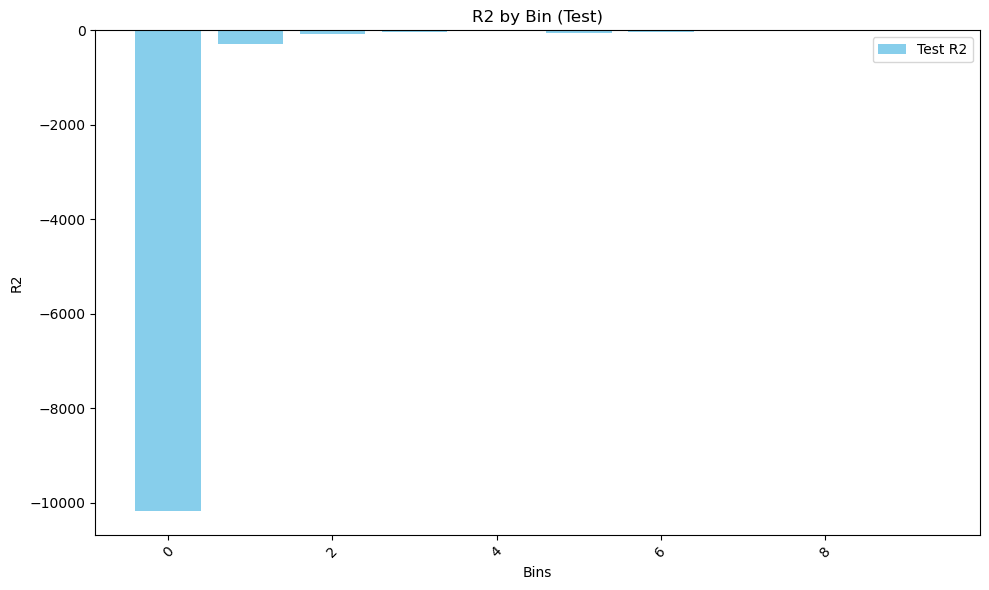

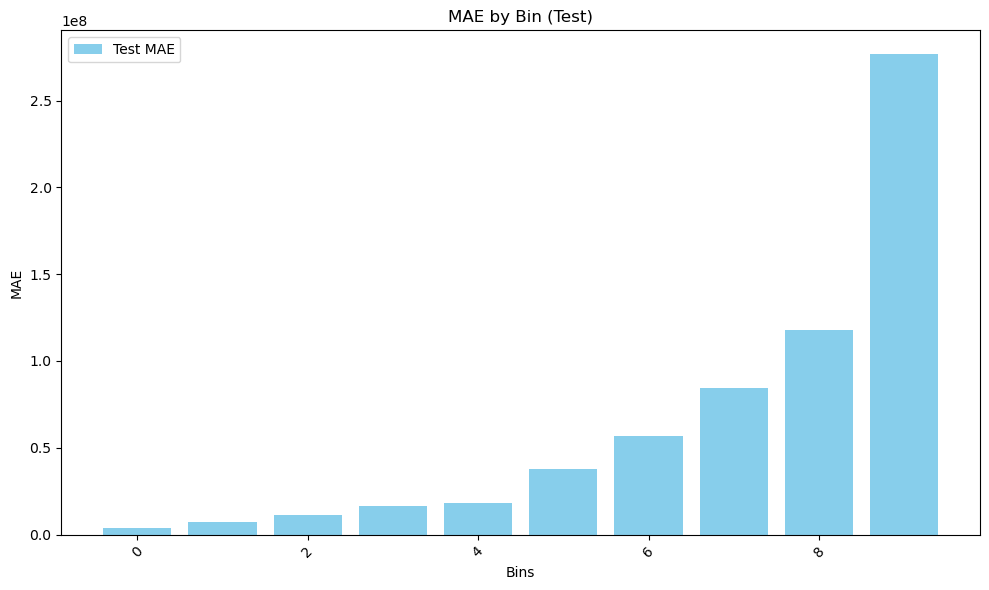

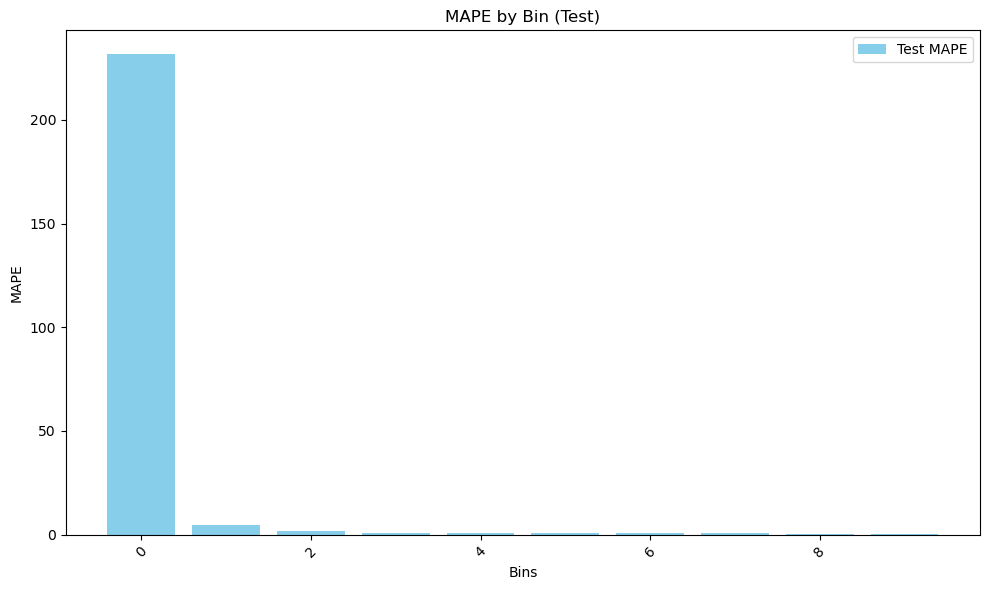

(   Bin            R2           MAE        MAPE
 0    0 -10162.624839  3.571714e+06  231.649878
 1    1   -299.666213  7.453454e+06    4.571443
 2    2    -73.093317  1.115377e+07    1.529431
 3    3    -31.482838  1.635545e+07    0.896613
 4    4    -15.038954  1.804523e+07    0.521324
 5    5    -49.236709  3.793438e+07    0.711054
 6    6    -42.427177  5.648513e+07    0.599553
 7    7    -17.196313  8.452958e+07    0.565306
 8    8     -6.931123  1.179666e+08    0.439342
 9    9     -1.853987  2.766283e+08    0.444813,
 0.6170276551504431,
 63012356.531093694,
 24.19287570124886)

In [5]:
from evaluation import _calculate_metrics
visualize_results(test_df,
                  y_true=y, y_pred=average_predictions, calculate_real_target=True, dataset_label="Test")

In [ ]:
from torchview import draw_graph

sample_input = torch.randn(1, len(FEATURES)).to(DEVICE)  # Tạo một batch đầu vào mẫu

graph = draw_graph(
        models[0],
        input_data=sample_input,
        expand_nested=True,
        show_shapes=True,
        save_graph=True,
)

# Lưu đồ thị dưới dạng file hình ảnh
visualized_graph = graph.visual_graph.render(
    cleanup=True  # Xóa file trung gian .dot sau khi lưu ảnh
)

graph.visual_graph

In [ ]:
from torchsummary import summary

# Hiển thị kiến trúc mạng
summary(models[0], input_size=(len(FEATURES),))  # Thay len(FEATURES) bằng số đặc trưng đầu vào